Nombre de los participantes Proyecto
Juan José Naranjo Velásquez CC : 1039474689
Alejandro Mora Suarez CC: 1128437044
Kenneth David Leonel Triana CC: 1192817456

[Problemática](https://www.elcolombiano.com/medellin/con-tos-y-gripa-viven-en-las-zonas-con-la-peor-calidad-del-aire-del-aburra-KB25241931)

La calidad del aire en Medellín juega un papel importante para adultos mayores, niños menores de 5 años, mujeres embarazadas y gente con afecciones cardiorrespiratorias, dado que una mala calidad del aire influye con afecciones respiratorias, cardiacas, de la piel y hasta con la aparición de cáncer.

Dentro de las métricas que acompaña la calidad del aire, el número de 2.5 micras es de gran relevancia dado que se toma como patrón para medir las partículas con un tamaño minúsculo y penetran más fácil en órganos como los pulmones.


**Objetivo proyecto**: Determinar la incidencia de las variables metereológicas sobre la métrica pm2.5 para la calidad del aire.

In [390]:
#Instalar librerias

#%pip install pandas numpy ydata-profiling ipywidgets numba

In [391]:
# importar librerias
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from scipy import stats
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


Obtener los datos y dejarlos en dataframes

In [392]:
#Extraer datos de calidad del aire en las estaciones  # 69 Caldas, 86 Aranjuez, 28 Itagui
def get_data (url):
    """
    Función utilizada para la obtención de datos en tipo DataFrame según las bases de datos del repositorio

    In[0]: url del dataset en el repositorio
    Out[0]: DataFrame con los datos extraídos
    """
    return pd.read_csv(url)

# Datos de la calidad del aire tomados desde red SIATA de monitoreo de calidad del aire en Valle de Aburra
cal_aire_ita = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/estacion_data_calidadaire_28_20240301_20240331.csv'
cal_aire_cal = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/estacion_data_calidadaire_69_20240301_20240331.csv'
cal_aire_ara = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/estacion_data_calidadaire_86_20240301_20240331.csv'


cal_aire_ita = get_data(cal_aire_ita)
cal_aire_cal = get_data(cal_aire_cal)
cal_aire_ara = get_data(cal_aire_ara)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion itagui 28
temp_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/Temperatura/estacion_data_temperatura_252__20240201_20240229.csv'
humedad_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/humedad/estacion_data_humedad_252__20240201_20240229.csv'
presion_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/presion/estacion_data_presion_252__20240201_20240229.csv'
precipitacion_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
vientos_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/vientos/estacion_data_vientos_252__20240201_20240229.csv'

temp_ita=get_data(temp_ita)
humedad_ita=get_data(humedad_ita)
presion_ita=get_data(presion_ita)
precipitacion_ita=get_data(precipitacion_ita)
vientos_ita=get_data(vientos_ita)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion Caldas 69
temp_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/Temperatura/estacion_data_temperatura_105__20240201_20240229.csv'
humedad_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/humedad/estacion_data_humedad_105__20240201_20240229.csv'
precipitacion_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
presion_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/presion/estacion_data_presion_105__20240201_20240229.csv'
vientos_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/vientos/estacion_data_vientos_105__20240201_20240229.csv'

temp_cal=get_data(temp_cal)
humedad_cal=get_data(humedad_cal)
precipitacion_cal=get_data(precipitacion_cal)
presion_cal=get_data(presion_cal)
vientos_cal=get_data(vientos_cal)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion aranjuez 86
temp_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/temperatura/estacion_data_temperatura_68__20240201_20240229.csv'
humedad_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/humedad/estacion_data_humedad_68__20240201_20240229.csv'
precipitacion_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/precipitacion/estacion_data_precipitacion_68__20240201_20240229.csv'
presion_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/presion/estacion_data_presion_68__20240201_20240229.csv'
vientos_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/vientos/estacion_data_vientos_68__20240201_20240229.csv'

temp_aranj=get_data(temp_aranj)
humedad_aranj=get_data(humedad_aranj)
precipitacion_aranj=get_data(precipitacion_aranj)
presion_aranj=get_data(presion_aranj)
vientos_aranj=get_data(vientos_aranj)

# nombres de caracteristicas en minusculas calidad aire
cal_aire_ita.columns = cal_aire_ita.columns.str.lower()
cal_aire_cal.columns = cal_aire_cal.columns.str.lower()
cal_aire_ara.columns = cal_aire_ara.columns.str.lower()

#nombres de caracteristicas en minusculas Itagui
temp_ita.columns = temp_ita.columns.str.lower()
humedad_ita.columns = humedad_ita.columns.str.lower()
presion_ita.columns = presion_ita.columns.str.lower()
vientos_ita.columns = vientos_ita.columns.str.lower()
precipitacion_ita.columns = precipitacion_ita.columns.str.lower()

#nombres de caracteristicas en minusculas Aranjuez
temp_aranj.columns = temp_aranj.columns.str.lower()
humedad_aranj.columns = humedad_aranj.columns.str.lower()
precipitacion_aranj.columns = precipitacion_aranj.columns.str.lower()
presion_aranj.columns = presion_aranj.columns.str.lower()
vientos_aranj.columns = vientos_aranj.columns.str.lower()

#nombres de caracteristicas en minusculas Caldas
temp_cal.columns = temp_cal.columns.str.lower()
humedad_cal.columns = humedad_cal.columns.str.lower()
precipitacion_cal.columns = precipitacion_cal.columns.str.lower()
presion_cal.columns = presion_cal.columns.str.lower()
vientos_cal.columns = vientos_cal.columns.str.lower()

### Eliminación de la columnas de calidad ya que no influye

Puesto que los datos extraidos de la red SIATA presenta semejanza en el nombre de la columna "Calidad" se procede a eliminar esas columnas

In [393]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

#-----------------------------------------------------------------
# Eliminar columna calidad de los diferentes dataframes de Itagui
columnasAEliminar = ['calidad_pm25','calidad_pm10','calidad_pm1','calidad_no','calidad_p_ssr',
                     'calidad_pliquida_ssr','calidad_rglobal_ssr','calidad_taire10_ssr',
                     'calidad_vviento_ssr','calidad_no2','calidad_nox','calidad_pst','calidad_dviento_ssr',
                     'calidad_haire10_ssr','calidad_ozono','calidad_so2','calidad_co']


# cal_aire_ita = eliminarColumnas(cal_aire_ita,columnasAEliminar)
# temp_ita = eliminarColumnas(temp_ita,'calidad')
# humedad_ita = eliminarColumnas(humedad_ita,'calidad')
# presion_ita = eliminarColumnas(presion_ita,'calidad')
# vientos_ita = eliminarColumnas(vientos_ita,'calidad')
# precipitacion_ita = eliminarColumnas(precipitacion_ita,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Caldas
cal_aire_cal = eliminarColumnas(cal_aire_cal, columnasAEliminar)
temp_cal = eliminarColumnas(temp_cal,'calidad')
humedad_cal = eliminarColumnas(humedad_cal,'calidad')
precipitacion_cal = eliminarColumnas(precipitacion_cal,'calidad')
presion_cal = eliminarColumnas(presion_cal,'calidad')
vientos_cal = eliminarColumnas(vientos_cal,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Aranjuez
cal_aire_ara = eliminarColumnas(cal_aire_ara ,columnasAEliminar)
temp_aranj = eliminarColumnas(temp_aranj,'calidad')
humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
presion_aranj = eliminarColumnas(presion_aranj,'calidad')
vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')



Se muestra uno de los dataframes ya sin las columnas de calidad

In [470]:
# Dataframe de la calidad del aire estación Itagui sin columnas Calidad
cal_aire_cal.head(3)



,fecha_hora,codigoserial,pm25,pm10,pm1,no,no2,nox,ozono,co,so2,pst,dviento_ssr,haire10_ssr,p_ssr,pliquida_ssr,rglobal_ssr,taire10_ssr,vviento_ssr
0,2024-01-01 00:00:00,69,36.4093,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,2024-01-01 01:00:00,69,68.4104,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2024-01-01 02:00:00,69,64.5992,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


Eliminación registros donde nuestra variable pm25 tenga valores -9999.0 que esto significa dato nulo
o que sean valores menores que 0

In [395]:
def eliminarRegistrosNulos(data,columna, valor):
    """
    Función para eliminar los valores nulos en una columna 
    estos son valores -999.0
    """
    # Nos quedamos con los valores que sean mayores a 0
    data = data[data[columna] > valor].reset_index(drop=True)
    return data

In [396]:
cal_aire_cal = eliminarRegistrosNulos(cal_aire_cal,'pm25', 0)
cal_aire_ara = eliminarRegistrosNulos(cal_aire_ara,'pm25', 0)


In [397]:
#Corroboramos que ya nuestra columna pm25 que es la que necesitabamos cercioranrnos que no tuviera datos nulos
cal_aire_cal['pm25'].min()

np.float64(0.5)

### Inputación de los datos metereologicos

In [398]:
def pasarDatosANulos(data,valor):
    """
    Función para pasar datos a valores nulos en un dataframe
    """
    # Reemplazamos los valores -999.0  u otro con NaN
    data = data.replace(valor, np.nan)
    return data

In [399]:
def inputacionDatos(data,columna):

    # Construimos el modelo
    imputer = KNNImputer(n_neighbors=15, weights="uniform")

    # Ajustamos el modelo e imputamos los missing values
    imputer.fit(data[[columna]])
    data[columna] = imputer.transform(data[[columna]]).ravel()

    print("Valores perdidos en normalized-losses: " + 
        str(data[columna].isnull().sum()))
    return data

### Presión

In [400]:
presion_cal[presion_cal['presion'] == -999.0].count()

fecha_hora    60337
presion       60337
dtype: int64

### Proceso comentado por temas de tiempo de ejcución

Remplazar valores malos a nulos 

In [401]:
# #Presion de las estaciones
# presion_cal = pasarDatosANulos(presion_cal,-999.0)
# presion_aranj = pasarDatosANulos(presion_aranj, -999.0)

# #Temperatura de las estaciones

# temp_cal = pasarDatosANulos(temp_cal,-999.0)
# temp_aranj = pasarDatosANulos(temp_aranj, -999.0)

# Humedad de las estaciones

# humedad_cal = pasarDatosANulos(humedad_cal,-999.0)
# humedad_aranj = pasarDatosANulos(humedad_aranj, -999.0)

# # Precipitación de las estaciones

# precipitacion_cal = pasarDatosANulos(precipitacion_cal,-999.0)
# precipitacion_aranj = pasarDatosANulos(precipitacion_aranj, -999.0)

# # Viento de las estaciones

# vientos_cal = pasarDatosANulos(vientos_cal,-999.0)
# vientos_aranj = pasarDatosANulos(vientos_aranj, -999.0)

Dejamos el codigo de abajo comentado por temas que la inputación se demora mucho, para eso guardamos la inputación en archivos csv

In [402]:
##-------Presion inputación en las estaciones ---------

# presion_cal = inputacionDatos(presion_cal,'presion')
# presion_aranj = inputacionDatos(presion_aranj,'presion')

##-------Temperatura inputación en las estaciones ---------

#temp_cal = inputacionDatos(temp_cal,'temperatura')
#temp_aranj = inputacionDatos(temp_aranj,'temperatura')

# humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
# precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
# vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')

##-------Humedad inputación en las estaciones ---------
#humedad_cal = inputacionDatos(humedad_cal,'humedad')
#humedad_aranj = inputacionDatos(humedad_aranj,'humedad')

##-------precipitaciones inputación en las estaciones ---------

# precipitacion_cal = inputacionDatos(precipitacion_cal,'p1')
#precipitacion_aranj = inputacionDatos(precipitacion_aranj,'p1')


##-------Vientos inputación en las estaciones ---------

# vientos_cal = inputacionDatos(vientos_cal,'velocidad_prom')
# vientos_cal = inputacionDatos(vientos_cal,'velocidad_max')
# vientos_cal = inputacionDatos(vientos_cal,'direccion_prom')
# vientos_cal = inputacionDatos(vientos_cal,'direccion_max')

# vientos_aranj = inputacionDatos(vientos_aranj,'velocidad_prom')
# vientos_aranj = inputacionDatos(vientos_aranj,'velocidad_max')
# vientos_aranj = inputacionDatos(vientos_aranj,'direccion_prom')
# vientos_aranj = inputacionDatos(vientos_aranj,'direccion_max')



Se guarda esas inputaciones en archivos csv

In [403]:
## Guardar en csv la inputacion
#Presion 
# presion_cal.to_csv('data/stage/presion_cal.csv', index=False)
# presion_aranj.to_csv('data/stage/presion_aranj.csv', index=False)

#Temperatura
#temp_cal.to_csv('data/stage/temp_cal.csv', index=False)
#temp_aranj.to_csv('data/stage/temp_aranj.csv', index=False)

#Humedad
#humedad_cal.to_csv('data/stage/humedad_cal.csv', index=False)
#humedad_aranj.to_csv('data/stage/humedad_aranj.csv', index=False)

#Precipitaciones
#precipitacion_cal.to_csv('data/stage/precipitacion_cal.csv', index=False)
#precipitacion_aranj.to_csv('data/stage/precipitacion_aranj.csv', index=False)

#Vientos

#vientos_cal.to_csv('data/stage/vientos_cal.csv', index=False)
#vientos_aranj.to_csv('data/stage/vientos_aranj.csv', index=False)


In [404]:
presion_cal[presion_cal['presion'] == -999.0].count()

fecha_hora    60337
presion       60337
dtype: int64

In [405]:
len(presion_cal)

394560

In [406]:
presion_cal.isnull().sum()

fecha_hora    0
presion       0
dtype: int64

### Se importan archivos de la inputación

In [407]:
#Se importa la inputacion

#Presion de las estaciones
presion_cal_inputado = pd.read_csv('data/stage/presion_cal.csv')
presion_aranj_inputado = pd.read_csv('data/stage/presion_aranj.csv')

#Temperatura de las estaciones

temp_cal_inputado = pd.read_csv('data/stage/temp_cal.csv')
temp_aranj_inputado = pd.read_csv('data/stage/temp_aranj.csv')

#Humedad de las estaciones

humedad_cal_inputado = pd.read_csv('data/stage/humedad_cal.csv')
humedad_aranj_inputado = pd.read_csv('data/stage/humedad_aranj.csv')

# Precipitación de las estaciones

precipitacion_cal_inputado = pd.read_csv('data/stage/precipitacion_cal.csv')
precipitacion_aranj_inputado = pd.read_csv('data/stage/precipitacion_aranj.csv')

# Viento de las estaciones

vientos_cal_inputado = pd.read_csv('data/stage/vientos_cal.csv')
vientos_aranj_inputado = pd.read_csv('data/stage/vientos_aranj.csv')

#Comprobamos que los valores nulos esten sustituidos

presion_cal_inputado.isnull().sum()

fecha_hora    0
presion       0
dtype: int64

Comparar la imputación con proceso sin inputar

In [408]:
# Revisar si cambio tamaño del dataframe
print (f"El tamaño del archivo de presión con proceso de imputacion es de: {len(presion_cal_inputado)}")
print (f"El tamaño del archivo de presión sin proceso de imputacion es de: {len(presion_cal)}")
print (f"El valor maximo de la presión es de: {presion_cal_inputado['presion'].max()}")
print (f"El valor minimo de la presión es de: {presion_cal_inputado['presion'].min()}")

El tamaño del archivo de presión con proceso de imputacion es de: 394560
El tamaño del archivo de presión sin proceso de imputacion es de: 394560
El valor maximo de la presión es de: 829.9
El valor minimo de la presión es de: 821.0


In [409]:
print("-----Sin inputación valores que harían ruido-------")
print(presion_cal[presion_cal['presion'] == -999.0].head(3))
print("\n")
print("----- Con inputación valores que hacían ruido------")
print(presion_cal_inputado[presion_cal['presion'] == -999.0].head(3))

-----Sin inputación valores que harían ruido-------
                fecha_hora  presion
14921  2024-01-11 08:41:00   -999.0
14922  2024-01-11 08:42:00   -999.0
14923  2024-01-11 08:43:00   -999.0


----- Con inputación valores que hacían ruido------
                fecha_hora     presion
14921  2024-01-11 08:41:00  826.084096
14922  2024-01-11 08:42:00  826.084096
14923  2024-01-11 08:43:00  826.084096


### Evaluar variables de calidad del aire

In [481]:
# se mira los calores maximos de cada columna de los dataframes
print(f"Ver valores maximo por todas las variables de nuestro dataset :\n{cal_aire_ara.max()}\n")
print(f"Ver valores minimos por todas las variables de nuestro dataset :\n{cal_aire_ara.max()}")

Ver valores maximo por todas las variables de nuestro dataset :
fecha_hora      2024-09-30 23:00:00
codigoserial                     86
pm25                       115732.0
pm10                        -9999.0
pm1                         -9999.0
no                          -9999.0
no2                         -9999.0
nox                         -9999.0
ozono                       -9999.0
co                          -9999.0
so2                         -9999.0
pst                         -9999.0
dviento_ssr                 -9999.0
haire10_ssr                 -9999.0
p_ssr                       -9999.0
pliquida_ssr                -9999.0
rglobal_ssr                 -9999.0
taire10_ssr                 -9999.0
vviento_ssr                 -9999.0
dtype: object

Ver valores minimos por todas las variables de nuestro dataset :
fecha_hora      2024-09-30 23:00:00
codigoserial                     86
pm25                       115732.0
pm10                        -9999.0
pm1                         

Filtrar el dataframe calidad aire para tomar las columnas objetivo ya que observamos que los datos del SIATA solo toma los valores de la particula pm25

In [410]:
def filtro_data_peque(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones

    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos segun el indice
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:3]
    return datosFiltrados

def filtro_data(data,nombreColumna,condicion):
    """"
    Función para tomar calidad de datos en tiempo real establecidos desde datos crudos

    In[0]: dataset, 'calidad_pm25', 1
    Out[0]: dataset filtrado con datos en calidad
    """
    # Filtrar los datos segun el indice y la condicion
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:4]
        return datosFiltrados[datosFiltrados.loc[:, nombreColumna] == condicion]
    else:
       return data.loc[data.loc[:, nombreColumna] == condicion]

# #Se tiene el filtrado estación Itagui
# dataCalidadFiltradaItagui = filtro_data_peque(cal_aire_ita)

#Se tiene el filtrado estación Caldas
dataCalidadFiltradaCaldas = filtro_data_peque(cal_aire_cal)

#Se tiene el filtrado estación Aranjuez
dataCalidadFiltradaAranjuez = filtro_data_peque(cal_aire_ara)

#Visualizar datos calidad aire itagui
dataCalidadFiltradaCaldas

,fecha_hora,codigoserial,pm25
0,2024-01-01 00:00:00,69,36.4093
1,2024-01-01 01:00:00,69,68.4104
2,2024-01-01 02:00:00,69,64.5992
3,2024-01-01 03:00:00,69,40.1624
4,2024-01-01 04:00:00,69,20.6041
...,...,...,...
6398,2024-09-30 19:00:00,69,27.5524
6399,2024-09-30 20:00:00,69,33.5056
6400,2024-09-30 21:00:00,69,35.8754
6401,2024-09-30 22:00:00,69,33.4113


Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

In [411]:

def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    return dataTemporal



def sacarPromedio(data,nombreColumna,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe contiene únicamente para nombre de columna y calidad
            2 si el dataframe contiene las columnas nombre de columna, calidad y codigo serial
            3 si el dataframe contiene las columnas nombre de columna, calidad y se aplican las demas características en este caso del viento

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura

    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median',
            'codigoserial': lambda x: stats.mode(x)[0]
        }).reset_index()
        return registroPromedio
    elif(revision == 3):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'median',
            'velocidad_max':'median',
            'direccion_prom':'median',
            'direccion_max':'median'
        }).reset_index()
        return registroPromedio


In [412]:
# #Sacar promedio Itagui
# temperaturaItaguiPromedio = sacarPromedio(temp_ita, 'temperatura',1)
# humedadItaguiPromedio = sacarPromedio(humedad_ita, 'humedad',1)
# presionItaguiPromedio = sacarPromedio(presion_ita, 'presion',1)
# precipitacionItaguiPromedio = sacarPromedio(precipitacion_ita, 'p1',1)
# vientosItaguiPromedio = sacarPromedio(vientos_ita,'velocidad_prom',3)

#Sacar promedio Caldas
temperaturaCaldasPromedio = sacarPromedio(temp_cal_inputado, 'temperatura', 1)
humedadCaldasPromedio = sacarPromedio(humedad_cal_inputado,'humedad',1)
precipitacionCaldasPromedio = sacarPromedio(precipitacion_cal_inputado, 'p1',1)
presionCaldasPromedio = sacarPromedio(presion_cal_inputado, 'presion',1)
vientosCaldasPromedio = sacarPromedio(vientos_cal_inputado,'velocidad_prom',3)

#Sacar promedio Aranjuez
temperaturaAranjuezPromedio = sacarPromedio(temp_aranj_inputado, 'temperatura', 1)
humedadAranjuezPromedio = sacarPromedio(humedad_aranj_inputado,'humedad',1)
precipitacionAranjuezPromedio = sacarPromedio(precipitacion_aranj_inputado, 'p1',1)
presionAranjuezPromedio = sacarPromedio(presion_aranj_inputado, 'presion',1)
vientosAranjuezPromedio = sacarPromedio(vientos_aranj_inputado,'velocidad_prom',3)


Al dataframe dataCalidadFiltrada se necesita sacar el promedio por dia para después concatanar las demas variables con el dataframe

In [413]:
# calidadAireItagui = sacarPromedio(dataCalidadFiltradaItagui, 'pm25',2)
calidadAireCaldas = sacarPromedio(dataCalidadFiltradaCaldas, 'pm25', 2)
calidadAireAranjuez = sacarPromedio(dataCalidadFiltradaAranjuez, 'pm25', 2)
calidadAireCaldas.iloc[:3]

,anio,mes,dia,pm25,codigoserial
0,2024,1,1,19.82980,69
1,2024,1,2,12.33775,69
2,2024,1,3,15.04940,69


### Creación de columnas pertinentes para el estudio

### Crear función para tener el día de la semana en una columna a cada dataframe

In [414]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana %W -> Weekday (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español
    nombreDia = dias_semana[indice_dia]
    print(nombreDia)
    return nombreDia

In [415]:
# # Aplicar la función a cada fila del DataFrame estación Itagui
# calidadAireItagui['dia_semana'] = calidadAireItagui.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# temperaturaItaguiPromedio['dia_semana'] = temperaturaItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# vientosItaguiPromedio['dia_semana'] = vientosItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# humedadItaguiPromedio['dia_semana'] = humedadItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# precipitacionItaguiPromedio['dia_semana'] = precipitacionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
# presionItaguiPromedio['dia_semana'] = presionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['dia_semana'] = calidadAireCaldas.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaCaldasPromedio['dia_semana'] = temperaturaCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosCaldasPromedio['dia_semana'] = vientosCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadCaldasPromedio['dia_semana'] = humedadCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionCaldasPromedio['dia_semana'] = precipitacionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionCaldasPromedio['dia_semana'] = presionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del Dataframe estacion Aranjuez

calidadAireAranjuez['dia_semana'] = calidadAireAranjuez.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaAranjuezPromedio['dia_semana'] = temperaturaAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosAranjuezPromedio['dia_semana'] = vientosAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadAranjuezPromedio['dia_semana'] = humedadAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionAranjuezPromedio['dia_semana'] = precipitacionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionAranjuezPromedio['dia_semana'] = presionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)


Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
D

### Se detalla uno de los dataframes sobre esta nueva columna dia_semana

In [416]:
calidadAireCaldas.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana
0,2024,1,1,19.82980,69,Lunes
1,2024,1,2,12.33775,69,Martes
2,2024,1,3,15.04940,69,Miercoles


### Se agrega columna  categorica dependiendo del codigo serial 


In [417]:

def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 28:
        return 'Estacion Itagui'
    elif codigo == 69:
        return 'Estacion Caldas'
    elif codigo == 86:
        return 'Estacion Aranjuez'

# # Aplicar la función a cada fila del DataFrame estación Itagui
# calidadAireItagui['estacion'] = calidadAireItagui.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['estacion'] = calidadAireCaldas.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Aranjuez
calidadAireAranjuez['estacion'] = calidadAireAranjuez.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Se muestran los primeros 3 registros de los dataframes con la nueva columna

calidadAireCaldas.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion
0,2024,1,1,19.82980,69,Lunes,Estacion Caldas
1,2024,1,2,12.33775,69,Martes,Estacion Caldas
2,2024,1,3,15.04940,69,Miercoles,Estacion Caldas


### Se crea una columba binaria sobre si ese dia fue festivo o no

In [418]:


# Obtener los festivos de Colombia
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
   
    fecha = datetime.date(int(anio), int(mes), int(dia))
    festivo = fecha in festivosColombia
    if festivo == True :
        return 1
    elif festivo == False :
        return 0

# # Aplicamos la función es_festivo
# calidadAireItagui['festivo'] = calidadAireItagui.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireCaldas['festivo'] = calidadAireCaldas.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
calidadAireAranjuez['festivo'] = calidadAireAranjuez.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)

# resultado para ver que el 25 de marzo fue festivo igual que el 29 y 29 representando el jueves y viernes santo
calidadAireCaldas.iloc[53:58]


,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo
53,2024,2,23,19.84190,69,Viernes,Estacion Caldas,0
54,2024,2,24,22.99240,69,Sabado,Estacion Caldas,0
55,2024,2,25,25.05505,69,Domingo,Estacion Caldas,0
56,2024,2,26,27.60095,69,Lunes,Estacion Caldas,0
57,2024,2,27,31.12200,69,Martes,Estacion Caldas,0


Unión de dataFrames

In [419]:
#Unir los dataframes
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana'],how='inner')

# #Unir los dataframes de la estación Itagui
# calidadAireItaguiUnido = unirDatos(calidadAireItagui,temperaturaItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,humedadItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,presionItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,precipitacionItaguiPromedio)
# calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,vientosItaguiPromedio)

#Unir los dataframes de la estación Caldas
calidadAireCaldasUnido = unirDatos(calidadAireCaldas,temperaturaCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,humedadCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,precipitacionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,presionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,vientosCaldasPromedio)

#Unir los dataframes de la estación Aranjuez
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuez,temperaturaAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,humedadAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,precipitacionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,presionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,vientosAranjuezPromedio)

calidadAireCaldasUnido.iloc[:3]

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,Lunes,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,69,Martes,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,69,Miercoles,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


In [420]:
def ConcatenadoRegistros(*data):
    """"
    Función para concatenar dataframes
    In[0]: (dataset1, dataset2, dataset3, ..., datasetn)
    Out[0]: dataset concatenado
    """

    return pd.concat([*data], axis=0)

# Si queremos unir el de itagui calidadAireItaguiUnido
dataSetCalidadAire = ConcatenadoRegistros( calidadAireCaldasUnido, calidadAireAranjuezUnido)

dataSetCalidadAire.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,Lunes,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,69,Martes,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,69,Miercoles,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


### Exploración dataset concatenado por las estaciones escogidas

In [421]:
dataSetCalidadAire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 273
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anio            547 non-null    int32  
 1   mes             547 non-null    int32  
 2   dia             547 non-null    int32  
 3   pm25            547 non-null    float64
 4   codigoserial    547 non-null    int64  
 5   dia_semana      547 non-null    object 
 6   estacion        547 non-null    object 
 7   festivo         547 non-null    int64  
 8   temperatura     547 non-null    float64
 9   humedad         547 non-null    float64
 10  p1              547 non-null    float64
 11  presion         547 non-null    float64
 12  velocidad_prom  547 non-null    float64
 13  velocidad_max   547 non-null    float64
 14  direccion_prom  547 non-null    float64
 15  direccion_max   547 non-null    float64
dtypes: float64(9), int32(3), int64(2), object(2)
memory usage: 66.2+ KB


Mirar si existen datos nulos

In [422]:
#Se mira nularidad en las variables 
dataSetCalidadAire.isnull().sum()


anio              0
mes               0
dia               0
pm25              0
codigoserial      0
dia_semana        0
estacion          0
festivo           0
temperatura       0
humedad           0
p1                0
presion           0
velocidad_prom    0
velocidad_max     0
direccion_prom    0
direccion_max     0
dtype: int64

### Listado de nuestras variables 

Variables Categoricas

In [423]:
#Lista de variables categóricas
columnasCategoricas = dataSetCalidadAire.select_dtypes(include = ["object", 'category']).columns.tolist()

dataSetCalidadAire[columnasCategoricas].head(3)

,dia_semana,estacion
0,Lunes,Estacion Caldas
1,Martes,Estacion Caldas
2,Miercoles,Estacion Caldas


Variables Númericas

In [424]:
#Lista de variables numéricas

columnasNumericas=dataSetCalidadAire.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetCalidadAire[columnasNumericas].head(3)

,anio,mes,dia,pm25,codigoserial,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,69,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,69,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0


Visualización variables categoricas

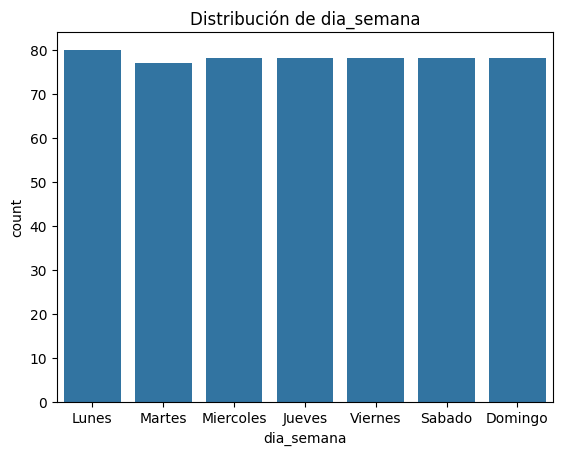

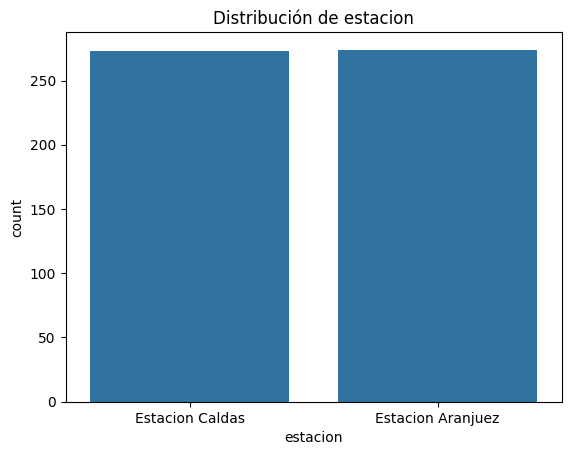

In [425]:
#Se recorre las columnas categoricas
for columna in columnasCategoricas:
    sns.countplot(x=dataSetCalidadAire[columna])
    plt.title(f"Distribución de {columna}")
    plt.show()


Visualización variables númericas

In [426]:
# Graficar las variables númericas con respecto a nuestra avriable objetivo que es pm25

# Histogramas de las variables númericas

# for columna in columnasNumericas:
#     sns.histplot(dataSetCalidadAire[columna], kde=True)
#     plt.title(f"Distribución de {columna}")
#     plt.show()

Box Plot de nuestra variable PM25

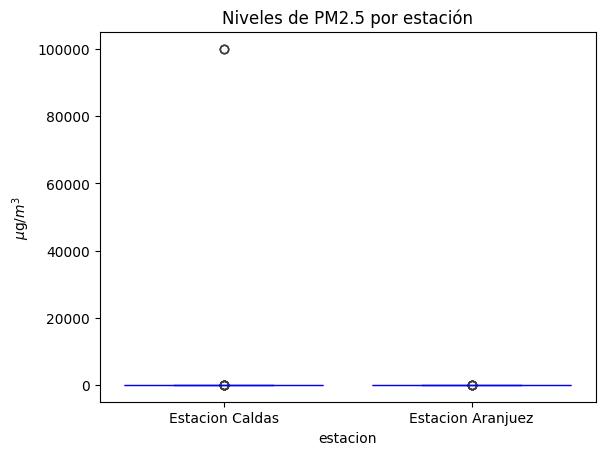

In [427]:
# Box Plot PM2.5 agrupado por estaciones
ax = sns.boxplot(x=dataSetCalidadAire['estacion'], y= dataSetCalidadAire['pm25'],  linewidth=0.9)
ax.set_title("Niveles de PM2.5 por estación")
plt.ylabel("$\mu$g/$m^3$")
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='blue')
plt.show()

### Eliminación de valores atípicos

In [428]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(dataSetCalidadAire['pm25'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataSetCalidadAire['pm25'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
valorInferior = Q1 - 1.5*IQR
valorSuperior = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{valorInferior}')
print(f'Valor atípico leve superior:{valorSuperior}')

Valor atípico leve inferior:-0.5524750000000029
Valor atípico leve superior:38.883925000000005


In [429]:
limpiaDataSetCalidadAire = dataSetCalidadAire.copy()

#Se tiene en cuenta los datos que se encuentren mayores a los valores de pm25 mayores al valor inferior
# y tambien lso que se encuentren menores al valor superior

limpiaDataSetCalidadAire = limpiaDataSetCalidadAire[(limpiaDataSetCalidadAire['pm25'] > valorInferior) & (limpiaDataSetCalidadAire['pm25'] < valorSuperior)]
limpiaDataSetCalidadAire.head()

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,Lunes,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.60,156.0,156.0
1,2024,1,2,12.33775,69,Martes,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.60,128.0,130.5
2,2024,1,3,15.04940,69,Miercoles,Estacion Caldas,0,17.8,73.50,0.0,826.6,1.5,2.25,155.0,153.0
3,2024,1,4,17.34030,69,Jueves,Estacion Caldas,0,20.0,69.10,0.0,827.0,1.4,2.10,160.0,158.0
4,2024,1,5,16.80595,69,Viernes,Estacion Caldas,0,19.3,71.05,0.0,826.9,1.5,2.30,147.0,147.0


### Encontrar valores atipicos en las variables de entrada

In [430]:
#utilización de LocalOutlierFactor con 8 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=8
lof = LocalOutlierFactor(n_neighbors=8, contamination=0.1)


# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(limpiaDataSetCalidadAire[columnasNumericas])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', limpiaDataSetCalidadAire[outliers].index.tolist())
# Eliminar los valores atípicos del dataframe original
limpiaDataSetCalidadAire = limpiaDataSetCalidadAire.loc[~outliers]
limpiaDataSetCalidadAire.head(3)

Indices de valores atípicos:  [2, 8, 24, 25, 32, 36, 51, 52, 61, 79, 83, 97, 106, 135, 150, 166, 177, 187, 205, 210, 211, 225, 240, 270, 1, 3, 10, 16, 25, 28, 37, 38, 42, 50, 60, 63, 67, 68, 70, 82, 91, 94, 106, 125, 145, 181, 206, 213, 215, 220, 242, 252, 260]


,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,1,1,19.82980,69,Lunes,Estacion Caldas,1,19.9,72.15,0.0,827.2,1.1,1.6,156.0,156.0
1,2024,1,2,12.33775,69,Martes,Estacion Caldas,0,19.6,76.10,0.0,826.3,1.6,2.6,128.0,130.5
3,2024,1,4,17.34030,69,Jueves,Estacion Caldas,0,20.0,69.10,0.0,827.0,1.4,2.1,160.0,158.0


In [431]:
#Cantidad de registros después de eliminar los valores atípicos del dataframe

len(limpiaDataSetCalidadAire)

474

### realizamos proceso de estandarización de nuestro dataset

### Correlación variables con nuestra variable pm25

In [432]:
#Se crea una copia de nuestro datasetCalidad
datosCorrelacion = limpiaDataSetCalidadAire.copy()
#Elimina variables categoricas para poder ver correlación 
columnas  = ['dia_semana', 'estacion']
datosCorrelacion = eliminarColumnas(datosCorrelacion,columnas)


Visualizamos la correlacion que tienen las caracteristicas sobre la variable de respuesta pm25

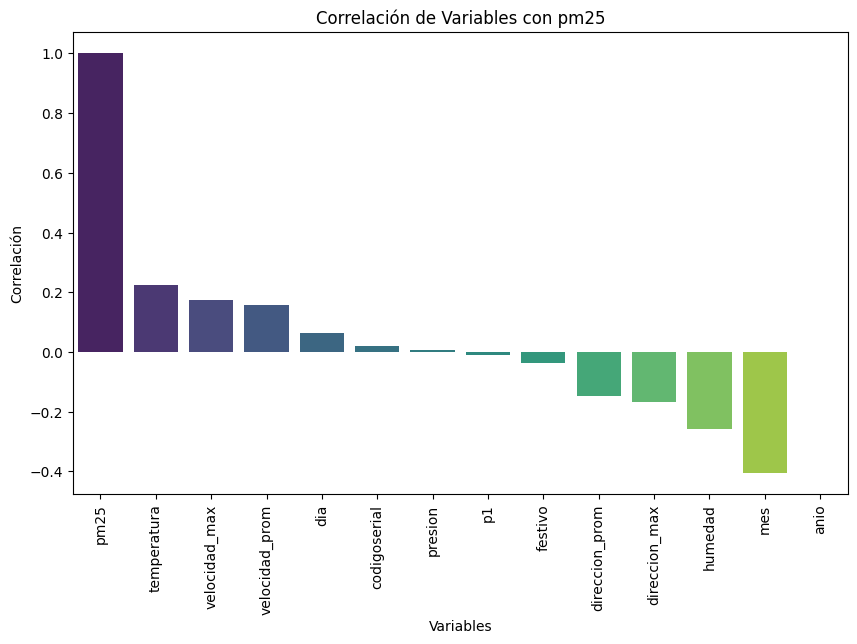

In [433]:

# Calcular la correlación de todas las variables con "pm25"
correlation = datosCorrelacion.corr()['pm25'].sort_values(ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlación de Variables con pm25')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

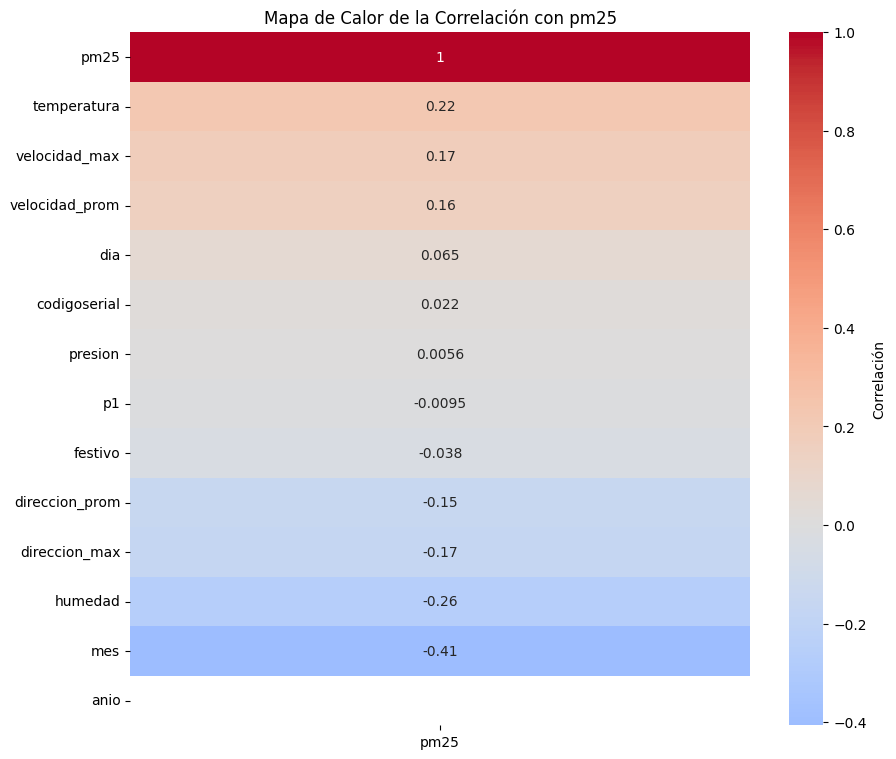

In [434]:
# Calcular la matriz de correlación
correlation_matrix = datosCorrelacion.corr()

# Filtrar para incluir solo la fila y columna de "pm25"
correlation_pm25 = correlation_matrix[['pm25']].sort_values(by='pm25', ascending=False)

# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_pm25, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de la Correlación con pm25')
plt.show()

## Hata acá Vamos

Análisis exploratorio de los datos

In [435]:
dataSetCalidadAire.describe()

,anio,mes,dia,pm25,codigoserial,festivo,temperatura,humedad,p1,presion,velocidad_prom,velocidad_max,direccion_prom,direccion_max
count,547.0,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,2024.0,5.007313,15.733090,568.300946,77.515539,0.047532,21.026364,72.747943,0.000486,839.204869,1.462829,2.444852,146.592771,142.299762
std,0.0,2.584814,8.812769,7390.592588,8.507766,0.212969,1.923066,8.390385,0.001580,12.974767,0.427233,0.722257,72.137495,65.778065
min,2024.0,1.000000,1.000000,5.368070,69.000000,0.000000,16.100000,51.250000,0.000000,824.100000,0.500000,0.900000,29.000000,39.000000
25%,2024.0,3.000000,8.000000,14.236175,69.000000,0.000000,19.800000,66.650000,0.000000,826.100000,1.200000,1.900000,87.500000,83.000000
50%,2024.0,5.000000,16.000000,17.745350,86.000000,0.000000,21.000000,71.100000,0.000000,849.800000,1.485944,2.400000,144.000000,145.000000
75%,2024.0,7.000000,23.000000,24.095275,86.000000,0.000000,22.600000,80.300000,0.000000,852.100000,1.700000,2.900000,195.500000,185.000000
max,2024.0,9.000000,31.000000,99999.000000,86.000000,1.000000,25.500000,91.800000,0.005761,854.600000,3.500000,5.000000,338.000000,333.000000


In [436]:
tablaPivote = dataSetCalidadAire.pivot_table(index = 'codigoserial',
                               columns = 'mes',
                               aggfunc = {'pm25':'mean',
                                          'presion':'mean',
                                          'p1':'mean'})
tablaPivote

p1                                                              \
mes             1    2         3         4         5    6    7         8    9   
codigoserial                                                                    
69            0.0  0.0  0.001858  0.003457  0.002497  0.0  0.0  0.000372  0.0   
86            0.0  0.0  0.000000  0.000601  0.000000  0.0  0.0  0.000000  0.0   

                   pm25  ...                presion                          \
mes                   1  ...          9           1           2           3   
codigoserial             ...                                                  
69            23.137929  ...  18.670479  825.961290  826.200000  825.781454   
86            22.337161  ...  19.008622  851.819355  852.101724  851.716129   

                                                                          \
mes                    4           5           6           7           8   
codigoserial                                                               
69            826.007124  826.396442  826.761667  826.446774  826.902713   
86            852.064910  851.950000  852.631667  852.301613  852.840323   

                          
mes                    9  
codigoserial              
69            825.761667  
86            851.610000  

[2 rows x 27 columns]

In [437]:
precipitacion_ita.p1.value_counts()
precipitacion_ita.groupby('p1')

In [438]:
pd.concat([presion_aranj, presion_ita, presion_cal],axis=1)

,fecha_hora,presion,fecha_hora,presion,calidad,fecha_hora,presion
0,2024-01-01 00:00:00,854.1,2024-01-01 00:00:00,0.0,155,2024-01-01 00:00:00,827.9
1,2024-01-01 00:01:00,854.1,2024-01-01 00:01:00,-999.0,151,2024-01-01 00:01:00,828.0
2,2024-01-01 00:02:00,854.1,2024-01-01 00:02:00,-999.0,151,2024-01-01 00:02:00,828.0
3,2024-01-01 00:03:00,854.1,2024-01-01 00:03:00,-999.0,151,2024-01-01 00:03:00,828.0
4,2024-01-01 00:04:00,854.1,2024-01-01 00:04:00,0.0,155,2024-01-01 00:04:00,828.0
...,...,...,...,...,...,...,...
394555,2024-09-30 23:55:00,853.1,2024-09-30 23:55:00,0.0,155,2024-09-30 23:55:00,827.0
394556,2024-09-30 23:56:00,853.1,2024-09-30 23:56:00,0.0,155,2024-09-30 23:56:00,827.0
394557,2024-09-30 23:57:00,853.1,2024-09-30 23:57:00,0.0,155,2024-09-30 23:57:00,827.0
394558,2024-09-30 23:58:00,853.0,2024-09-30 23:58:00,0.0,155,2024-09-30 23:58:00,827.0


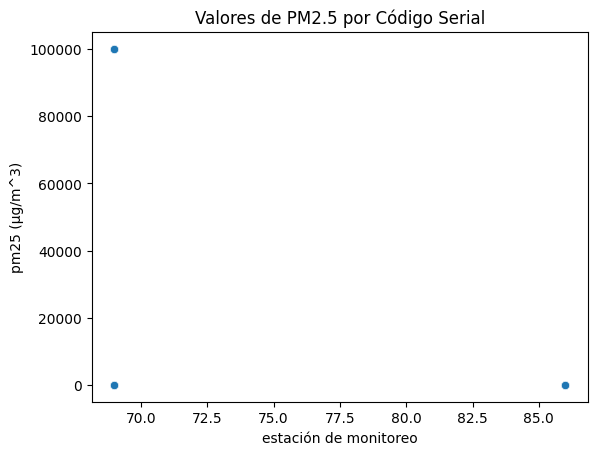

In [439]:
# Grafico por puntos
sns.scatterplot(x=dataSetCalidadAire['codigoserial'], y=dataSetCalidadAire['pm25'])
plt.title('Valores de PM2.5 por Código Serial')
plt.xlabel('estación de monitoreo')
plt.ylabel('pm25 (µg/m^3)')
plt.show()

Text(0.5, 1.0, 'Valores de P1 por Codigo serial')

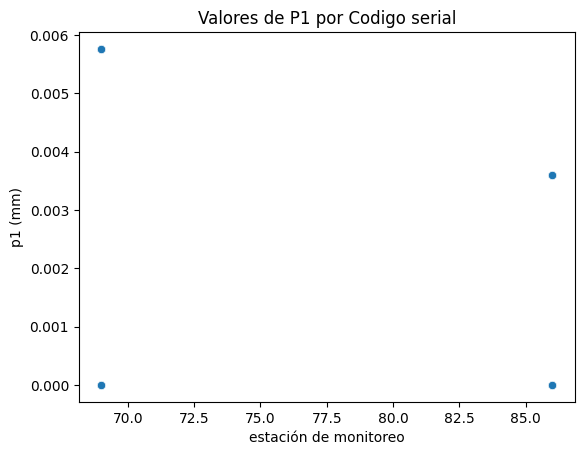

In [440]:
# Grafico de dispersión por p1

sns.scatterplot(x=dataSetCalidadAire['codigoserial'], y=dataSetCalidadAire['p1'])
plt.xlabel('estación de monitoreo')
plt.ylabel('p1 (mm)')
plt.title('Valores de P1 por Codigo serial')


Pandas profile

In [441]:
from ydata_profiling import ProfileReport

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [ ]:
#Generar y mostrar el reporte
reporte = ProfileReport(dataSetCalidadAire,
                        title="Reporte estadístico",
                        explorative=True,
                        dataset={
                        "description": "Este es un analisis preeliminar para comprender de mejor forma los datos de nuestro dataset",
                        "author": "Kenneth David Leonel Triana , Juan Jose Naranjo, Alejandro Mora",
                        "url": "https://github.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra",
                    },)
reporte.to_notebook_iframe()
reporte.to_file("reporte.html")

Aspectos de mejora de la exploración de datos

Al detallar el comportamiento del dataset nos dimos cuenta que se debe mejorar las sigueintes cosas:

- Limpieza de datos: Existen algunos datos con valores negativos que podrian referirse a datos faltantes, sin embargo, en el datset se reflejan con valores como -9999. Este es un aspecto a mejorar ya que al realizar el promedio de las columnas detallamos que el promedio arroja valores negativos sin sentido.

- Normalización de datos: Al explorar los dataset detallamos que es se puede normalizar las columnas temperatura, humedad, presion o pm25.

- Eliminación de datos: Las personas que continuen con la mejora de los resultados presentados pueden detallar si esos valores atipicos en ciertos registros se puedan considerar a eliminar.

- Transformación de datos: Al explorar los dataset detallamos que algunas columnas pueden tener una distribución diferente a la normal, lo que puede afectar a los resultados.

- Revisión de estaciones de monitoreo: Tener en cuenta los datos con sentido de las variables metereológicas en las diferentes estaciones, dado que puede existir la posibilidad que los sensores de alguna de ellas no arroje resultados coherentes o no estén en funcionamiento.

